In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [2]:

kst = pd.read_csv("D:/datasets/Instandhaltungskosten_pro_qm.txt", sep=",", encoding = "ISO-8859-1")
print(kst.head())
print(kst.columns)

   Monate  Inst_Haltung_qm
0   120.0            100.0
1    17.0             35.0
2    22.0             40.0
3     6.0             20.0
4     9.0             15.0
Index(['Monate', 'Inst_Haltung_qm'], dtype='object')


In [3]:
# Die Spalten des DataFrame aufteilen in Source und Target- Variablen  (X,y) 
#   und daraus einen array machen
X = np.array(kst.Monate)
y = np.array(kst.Inst_Haltung_qm)


In [4]:
plt.scatter(X,y)
plt.xlabel('Anzahl_Monate')
plt.ylabel('Kosten pro qm')
#plt.legend(loc='upper left')
plt.show()

In [5]:
#Testdaten / Trainingsdaten
# Test-/Trainingssätze erstellen
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


In [6]:
# Reshape um das passende Format für den Algorithmus zu erhalten
X_train = X_train.reshape(-1, 1)         # array.reshape(-1,1) is nötig, damit der fit-Algorithmus nicht auf 
                                         #    einen Fehler läuft  (75,)   reshape -> (75, 1)
lr = LinearRegression().fit(X_train, y_train)

In [7]:
# Vorhersage für die Testwerte
X_test = X_test.reshape(-1, 1)
print("Test set predictions:\n", lr.predict(X_test))

Test set predictions:
 [60.72867156 64.34534638 55.50458571 58.71940777 88.85836459 68.36387396
 51.48605814 68.76572671 68.36387396 59.12126053 56.30829123 66.35461017
 58.71940777 63.54164086 66.75646292 57.5138495  68.76572671 55.50458571
 66.75646292]


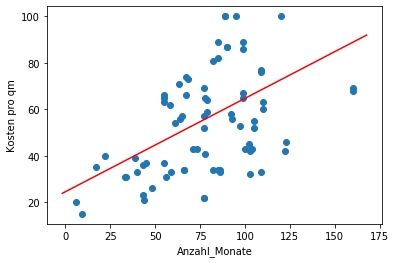

lr.coef_: [0.40185276]
lr.intercept_: 24.561923374848593


In [8]:
# Hilfsfunktion zum Zeichnen einer Linie entsprechend Achsenabschnitt und Steigung
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, color="red", linewidth=1.5)
    
# Kontrollausgabe
plt.scatter(X,y)
plt.xlabel('Anzahl_Monate')
plt.ylabel('Kosten pro qm')
#plt.legend(loc='upper left')
abline(lr.coef_,lr.intercept_)
plt.show()

print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

In [9]:
# Ausgabe des Scoring-Wertes
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.29
Test set score: -0.14


In [10]:
# Vorhersage für einen neuen Werte 
NeuerWert = np.array(50)
print(NeuerWert)
NeuerWert = NeuerWert.reshape(-1, 1)
print(NeuerWert)
print("Test set predictions:\n", lr.predict(NeuerWert))

50
[[50]]
Test set predictions:
 [44.65456126]


Ridge Regression

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)                # alpha-Paramter auf 1 (Default)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.29
Test set score: -0.14


In [12]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.29
Test set score: -0.14


In [13]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.29
Test set score: -0.14


In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used:", np.sum(lasso.coef_ != 0))     # Anzeigen der Anzahl der berücksichtigten Attribute

Training set score: 0.29
Test set score: -0.14
Number of features used: 1
